## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [3]:
import os
import keras
import itertools

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices())
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "batch-size-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024  

3125/3125 [==============================] - 20s 6ms/step - loss: 0.6405 - accuracy: 0.7711 - val_loss: 1.6008 - val_accuracy: 0.5411
Epoch 41/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6274 - accuracy: 0.7761 - val_loss: 1.6085 - val_accuracy: 0.5441
Epoch 42/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6249 - accuracy: 0.7783 - val_loss: 1.5959 - val_accuracy: 0.5420
Epoch 43/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6173 - accuracy: 0.7803 - val_loss: 1.6387 - val_accuracy: 0.5465
Epoch 44/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.6152 - accuracy: 0.7802 - val_loss: 1.6229 - val_accuracy: 0.5437
Epoch 45/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.5989 - accuracy: 0.7858 - val_loss: 1.6519 - val_accuracy: 0.5484
Epoch 46/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.5889 - accuracy: 0.7903 - val_loss: 1.6548 - val_accurac

391/391 [==============================] - 4s 10ms/step - loss: 0.1547 - accuracy: 0.9526 - val_loss: 2.2152 - val_accuracy: 0.5188
Epoch 32/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1441 - accuracy: 0.9555 - val_loss: 2.2660 - val_accuracy: 0.5122
Epoch 33/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1419 - accuracy: 0.9560 - val_loss: 2.2725 - val_accuracy: 0.5117
Epoch 34/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1285 - accuracy: 0.9600 - val_loss: 2.3018 - val_accuracy: 0.5194
Epoch 35/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1216 - accuracy: 0.9633 - val_loss: 2.3111 - val_accuracy: 0.5148
Epoch 36/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1074 - accuracy: 0.9680 - val_loss: 2.3633 - val_accuracy: 0.5122
Epoch 37/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1034 - accuracy: 0.9697 - val_loss: 2.4039 - val_accuracy: 0.5124
Epoc

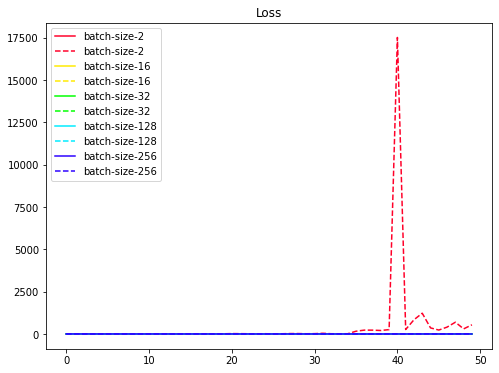

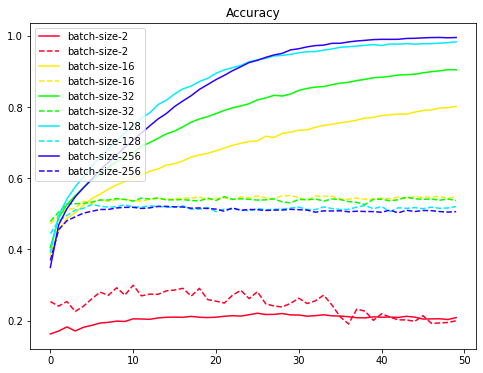

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
'''
將BN放在 Input Layer 後，hidden_layer前。
以此例來看Batch size-256 準確率可達 0.9955，驗證集的準確率為0.5061
比先前Batch size-1024，BN 放在 hidden_layer後的結果還要好。
'''